# Assignment 2 - part 1

## Feed forward network (multilayer perceptron)

In this assignment you shall develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts images and comments should be displayed in this notebook.

You shall use this framework to train (at least) 3 feed-forward neural networks and compare their performance:
- first, use only linear layers and non-linearites of your choice. You shall decide on the depth and width of the layers as well as all other hyperparameters as you see fit.
- second, use linear layers, non-linearities and drop-out
- third, use linear layers, non-linearities,  drop-out and batch norm


# Data Preparation

In [1]:

import torch
import torchvision
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(0)

train_dataset = torchvision.datasets.FashionMNIST('data/train', train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST('data/test', train=False, download=True)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(device)
train_dataset.data = train_dataset.data.to(torch.float)
test_dataset.data = test_dataset.data.to(torch.float)

data = dict()
data["x"] = train_dataset.data
data["y"] = train_dataset.targets
data["x_test"] = test_dataset.data
data["y_test"] = test_dataset.targets

batch_size = 64
train_set = TensorDataset(data["x"], data["y"])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
output_dim = len(train_dataset.classes)

### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in all necessary hyper-parameters for the training. You shall not fix the hyper-parameters in the code of the function itself as fixed values.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* anything else you deem important or useful for monitoring purposes etc. 

In [2]:
from models.mlp1 import MlpModel1
from models.mlp2 import MlpModel2
from models.mlp3 import MlpModel3

# untrained models
model1 = MlpModel1(data["x"].shape[1], data["x"].shape[2], output_dim)
model2 = MlpModel2(data["x"].shape[1], data["x"].shape[2], output_dim)
model3 = MlpModel3(data["x"].shape[1], data["x"].shape[2], output_dim)

# Model Descriptions

In [3]:
print(model1)

MlpModel1(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=200, bias=True)
    (2): ReLU()
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=50, bias=True)
    (6): ReLU()
    (7): Linear(in_features=50, out_features=25, bias=True)
    (8): ReLU()
    (9): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [4]:
print(model2)

MlpModel2(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=200, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.25, inplace=False)
    (7): Linear(in_features=100, out_features=50, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.25, inplace=False)
    (10): Linear(in_features=50, out_features=25, bias=True)
    (11): ReLU()
    (12): Dropout(p=0.25, inplace=False)
    (13): Linear(in_features=25, out_features=10, bias=True)
  )
)


In [5]:
print(model3)

MlpModel3(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=200, bias=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): Dropout(p=0.25, inplace=False)
    (5): Linear(in_features=200, out_features=100, bias=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU()
    (8): Dropout(p=0.25, inplace=False)
    (9): Linear(in_features=100, out_features=50, bias=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.25, inplace=False)
    (13): Linear(in_features=50, out_features=25, bias=True)
    (14): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): ReLU()
    (16): Dropout(p=0.25, inplace=False)
    (17): Linear(in_features=25, out_features=10, bias=True)
  )
)


### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

MlpModel1 before training
Accuracy on the 10 examples: 0.10000000149011612


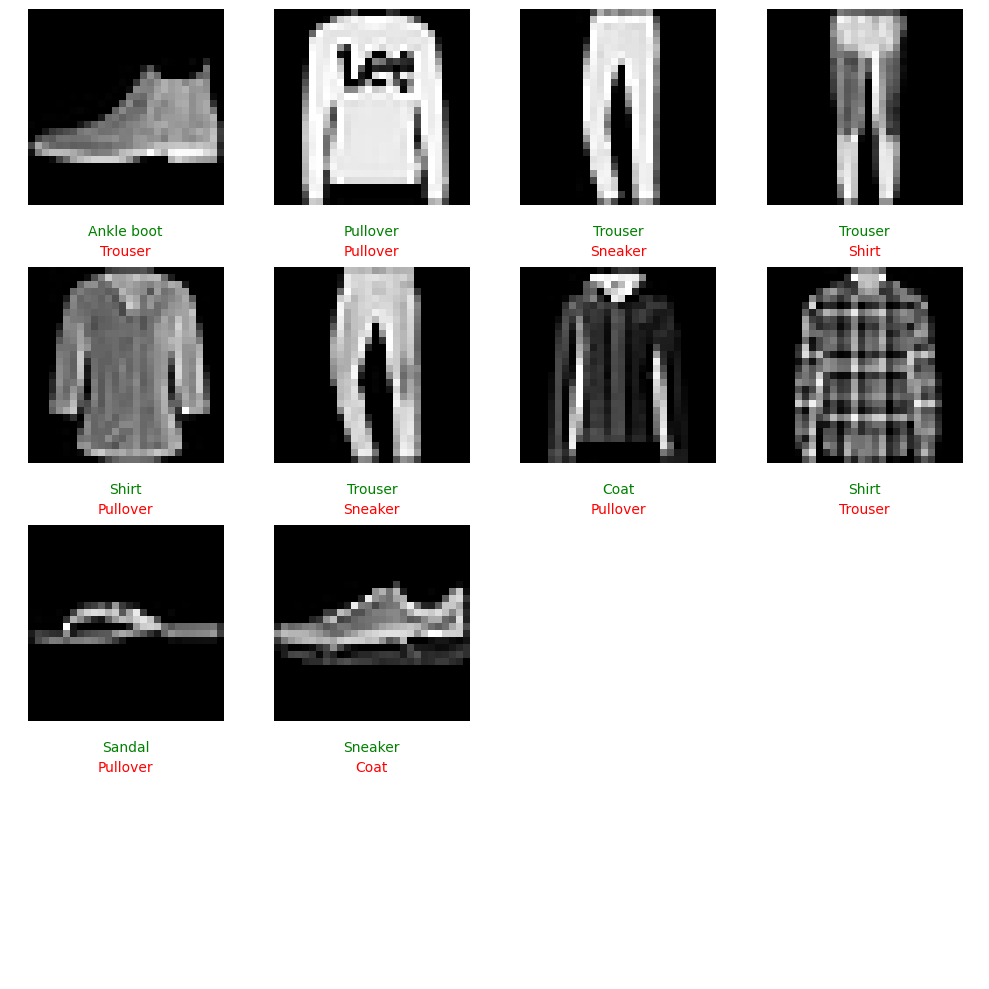

MlpModel2 before training
Accuracy on the 10 examples: 0.10000000149011612


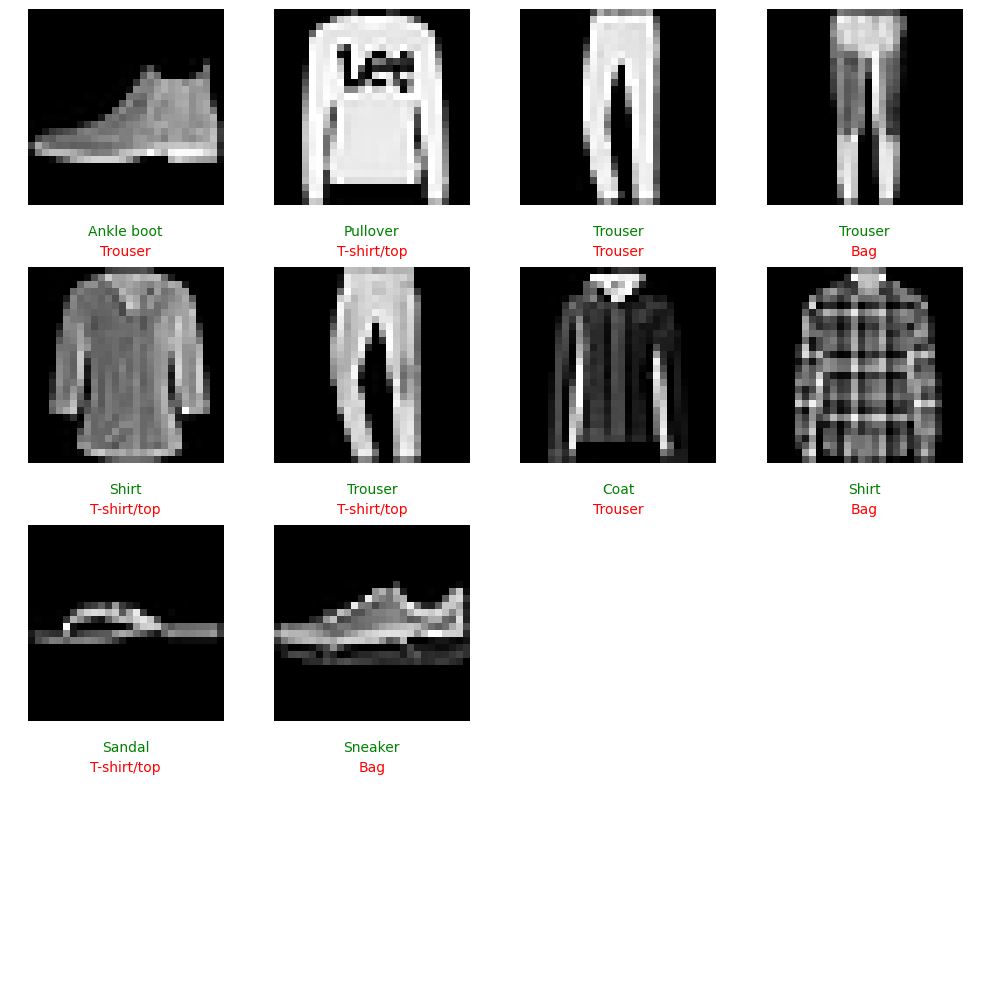

MlpModel3 before training
Accuracy on the 10 examples: 0.10000000149011612


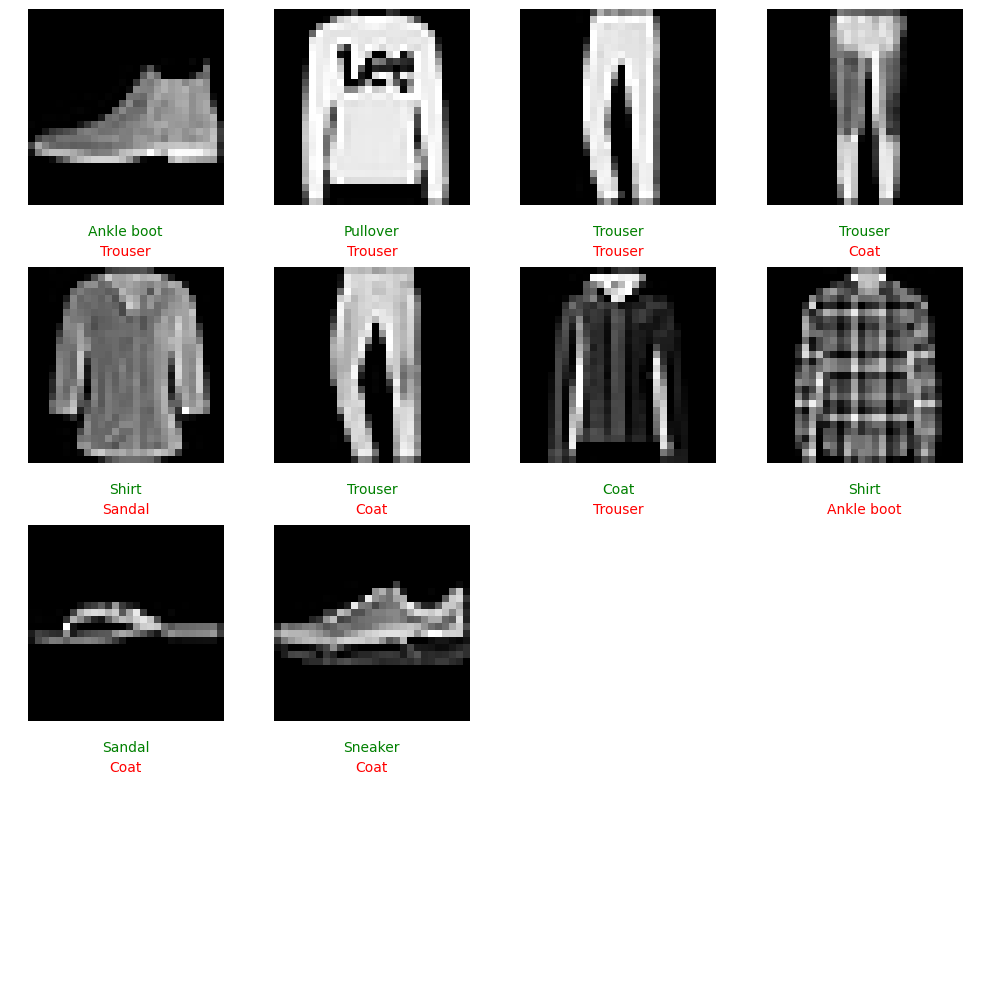

In [6]:
# define function mlp_train so that it can be run from this cell
from utils import mlp_apply

test_indexes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # list of 10 indexes - examples to extract from test set

# Before training
print(f"{type(model1).__name__} before training")
mlp_apply(model1, test_indexes, test_dataset)
print(f"{type(model2).__name__} before training")
mlp_apply(model2, test_indexes, test_dataset)
print(f"{type(model3).__name__} before training")
mlp_apply(model3, test_indexes, test_dataset)

### Train and apply model

Use your functions defined above to train the three models. Try different values of the hyper-paramter settings. You shall achieve at least 80% test accuracy with all your models and at least 90% test accuracy with the best one.

Describe briefly your three models and your hyper-parameter setups and comment your results.

**Compare the performance of the three models using suitable supportive tables and graphs, and complemented by relevant comments.**

In [7]:
from utils import plot_model_metrics
from train import mlp_train


def train_plot_model(model):
    model, model_metrics = mlp_train(model, train_loader, test_dataset,
                                     learning_rate=0.0001,
                                     max_epochs=100)
    plot_model_metrics(model_metrics)
    model_train_accuracy = model_metrics["train_accuracies"][-1]
    model_test_accuracy = model_metrics["test_accuracies"][-1]
    print(f"{type(model).__name__} after training")
    print(f"Train Accuracy: {model_train_accuracy}")
    print(f"Test Accuracy: {model_test_accuracy}")
    return model


In [ ]:
train_plot_model(model1)
mlp_apply(model1, test_indexes, test_dataset)

In [ ]:
train_plot_model(model2)
mlp_apply(model2, test_indexes, test_dataset)

In [ ]:
train_plot_model(model3)
mlp_apply(model3, test_indexes, test_dataset)